# Avvistamenti per nazione

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from math import ceil, floor


OUT_FOLDER = 'grafici/AvvistamentiPerNazione'
FIGURE_SIZE = (20, 8)

%matplotlib inline

In [2]:
DATASET = 'ufos.csv'
data = pd.read_csv(DATASET)
len(data)

80332

In [3]:
countries_to_consider = {
    "us": 318,
    "ca": 35,
    "gb": 64,
    "au": 23,
    "mx": 120,
    "nz": 4.5
}
# I nomi estesi dei paesi, per creare una legenda nel grafico
countries_names = {
    "us": "Stati Uniti",
    "ca": "Canada",
    "gb": "Regno Unito",
    "au": "Australia", 
    "mx": "Mexico", 
    "in": "Indonesia",
    "nz": "Nuova Zelanda", 
    "de": "Germania"
}

country_counts = data['country'].value_counts()
country_counts['other'] = sum(country_counts < 136)
country_counts = country_counts[countries_to_consider.keys()]
for country, population in countries_to_consider.items():
    country_counts[country] /= population
country_counts = country_counts.sort_values(ascending=False)

In [5]:
country_counts = country_counts.head(len(COLORS))

In [4]:
TITLE = 'Nazioni con più avvistamenti UFO'
LABELS = [countries_names[country] for country in countries_to_consider.keys()]
YLABEL = XLABEL = 'Avvistamenti per milione di abitanti'
COLORS = [
    (11, 132, 165), (246, 200, 95), (157, 216, 102), (202, 71, 47), (111, 78, 124)
]
COLORS = [(r/255, g/255, b/255, 1.0) for (r, g, b) in COLORS]

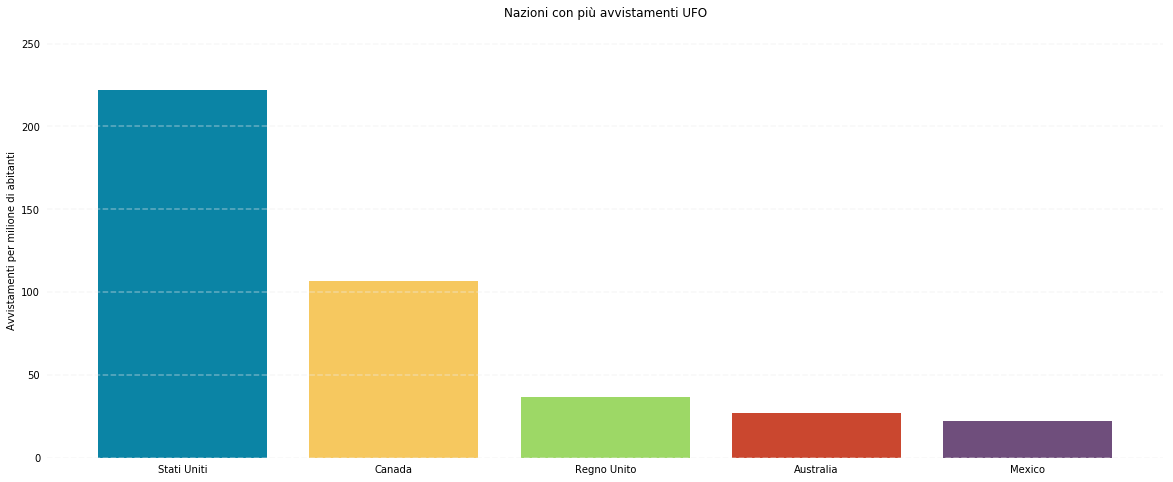

In [6]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

bars = plt.bar(country_counts.index, country_counts.values, color=COLORS)

ax.set_xticklabels(LABELS)
ax.set_ylabel(YLABEL)
ax.set_title(TITLE)

for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

# Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.savefig(f'{OUT_FOLDER}/BarChart_Verticale.png')
plt.show()

## Versione Barchart Orizzontale

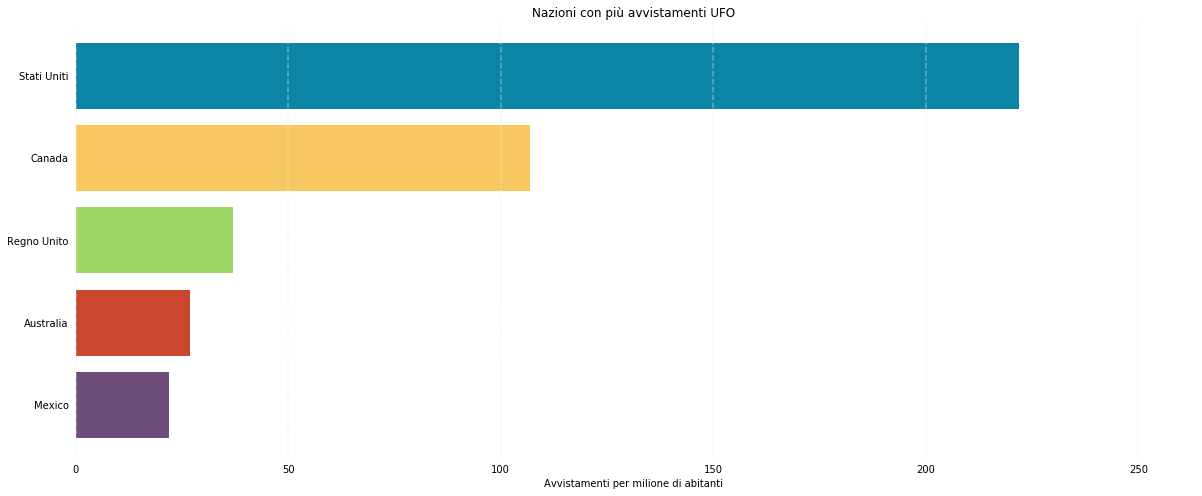

In [8]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

colors = [
    (11, 132, 165), (246, 200, 95), (157, 216, 102), (202, 71, 47), (111, 78, 124)
]
colors = [(r/255, g/255, b/255, 1.0) for (r, g, b) in colors]

bars = ax.barh(country_counts.index, country_counts.get_values(), color=colors)

labels = [label for _, label in countries_names.items()]
# Con i subplot per qualche motivo non funzionano xticks, xlabel, title
# Bisogna usare le versioni set_*
ax.set_yticklabels(labels)
ax.set_xlabel('Avvistamenti per milione di abitanti')
ax.set_title('Nazioni con più avvistamenti UFO')

# Per fare che la barra più grande è in alto
plt.gca().invert_yaxis()

# Rimuovo i bordi del grafico
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig(f'{OUT_FOLDER}/BarChart_Orizzontale.png')
plt.show()